In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

plt.style.use("seaborn-poster")

In [4]:
n = 10000
Days_list = (-3,-2,-1,0)
init=1

path = "results/"+str(n)+"allpc_days_"
df = pd.DataFrame()

for days in ("-3","-2","-1","0"):
    for detect in ("0.1","0.3","0.5"):
        for gens in ("1","2"):
            for file in glob.glob(path+"*"+days+"init_1_detect"+"*"+detect+"_gens"+"*"+gens+".csv"):
                temp = pd.read_csv(file)
                #temp['detect'] = float(detect)
                temp['N_Gens'] = int(gens)
                df = df.append(temp)
df.pc = ["$%s$" % x for x in df.pc]

df.head()

#df.N_Gens.unique()


,DAYS,actual_gen_times_mean,avg_daily_growth_rate,cases,detect,die_out,pc,secondary_cases_25,secondary_cases_75,secondary_cases_mean,sim,N_Gens
0,-3.0,3.495648,1.039170,19,0.1,True,$1.0$,0.0,0.0,1.140427,0,1
1,-3.0,3.495648,1.000000,6,0.1,True,$1.0$,0.0,0.0,1.140427,1,1
2,-3.0,3.495648,1.013607,9,0.1,True,$1.0$,0.0,0.0,1.140427,2,1
3,-3.0,3.495648,1.109361,135,0.1,True,$1.0$,0.0,0.0,1.140427,3,1
4,-3.0,3.495648,1.000000,6,0.1,True,$1.0$,0.0,0.0,1.140427,4,1


,DAYS,pc,N_Gens,die_out
1,-3.0,$0.5$,2,0.8459
3,-3.0,$0.75$,2,0.8527
5,-3.0,$0.9$,2,0.8606
7,-3.0,$1.0$,2,0.8680
9,-2.0,$0.5$,2,0.8425
11,-2.0,$0.75$,2,0.8519
13,-2.0,$0.9$,2,0.8542
15,-2.0,$1.0$,2,0.8559
0,-3.0,$0.5$,1,0.8453
2,-3.0,$0.75$,1,0.8506


8     0.8435
10    0.8483
12    0.8503
14    0.8531
Name: die_out, dtype: float64

,DAYS,pc,N_Gens,die_out,Baseline,Improvement,Scenario
1,-3.0,$0.5$,2,0.8459,0.8435,0.0024,"Days =-3.0, N_Gens=2"
3,-3.0,$0.75$,2,0.8527,0.8483,0.0044,"Days =-3.0, N_Gens=2"
5,-3.0,$0.9$,2,0.8606,0.8503,0.0103,"Days =-3.0, N_Gens=2"
7,-3.0,$1.0$,2,0.8680,0.8531,0.0149,"Days =-3.0, N_Gens=2"
9,-2.0,$0.5$,2,0.8425,0.8435,-0.0010,"Days =-2.0, N_Gens=2"
11,-2.0,$0.75$,2,0.8519,0.8483,0.0036,"Days =-2.0, N_Gens=2"
13,-2.0,$0.9$,2,0.8542,0.8503,0.0039,"Days =-2.0, N_Gens=2"
15,-2.0,$1.0$,2,0.8559,0.8531,0.0028,"Days =-2.0, N_Gens=2"
0,-3.0,$0.5$,1,0.8453,0.8435,0.0018,"Days =-3.0, N_Gens=1"
2,-3.0,$0.75$,1,0.8506,0.8483,0.0023,"Days =-3.0, N_Gens=1"


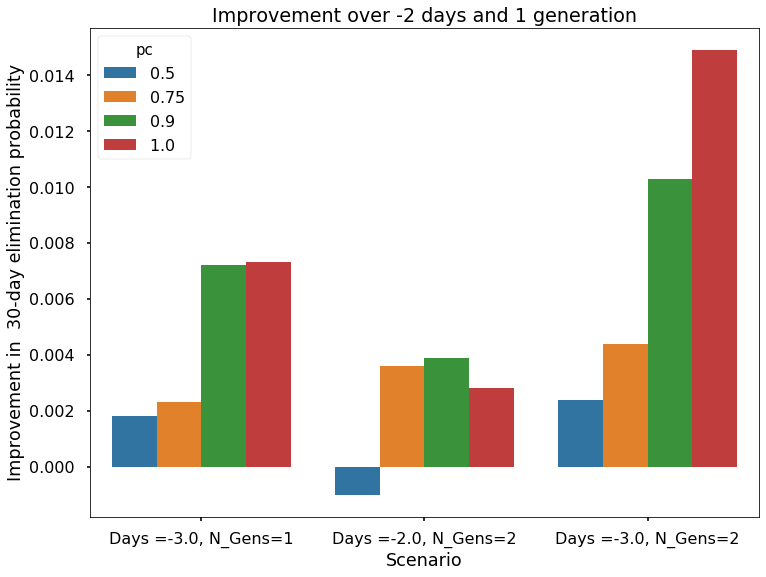

In [9]:
# Plot for detect = 0.3

detect = 0.3

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.3
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
display(mean_col)
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
display(baseline_probs)
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
#print(mean_col)

mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
#print(mean_col)


mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1']

display(mean_col)
# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1", "Days =-2.0, N_Gens=2", "Days =-3.0, N_Gens=2"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement over -2 days and 1 generation")
plt.show()

    DAYS      pc  N_Gens  die_out  Baseline  Improvement
1   -3.0   $0.5$       2   0.8316    0.8310       0.0006
3   -3.0  $0.75$       2   0.8402    0.8340       0.0062
5   -3.0   $0.9$       2   0.8443    0.8371       0.0072
7   -3.0   $1.0$       2   0.8497    0.8395       0.0102
9   -2.0   $0.5$       2   0.8322    0.8310       0.0012
11  -2.0  $0.75$       2   0.8396    0.8340       0.0056
13  -2.0   $0.9$       2   0.8431    0.8371       0.0060
15  -2.0   $1.0$       2   0.8454    0.8395       0.0059
0   -3.0   $0.5$       1   0.8324    0.8310       0.0014
2   -3.0  $0.75$       1   0.8355    0.8340       0.0015
4   -3.0   $0.9$       1   0.8364    0.8371      -0.0007
6   -3.0   $1.0$       1   0.8396    0.8395       0.0001
8   -2.0   $0.5$       1   0.8310    0.8310       0.0000
10  -2.0  $0.75$       1   0.8340    0.8340       0.0000
12  -2.0   $0.9$       1   0.8371    0.8371       0.0000
14  -2.0   $1.0$       1   0.8395    0.8395       0.0000
    DAYS      pc  N_Gens  die_o

Text(0.5, 1.0, 'Improvement in  30-day elimination probability over -2 days and 1 generation')

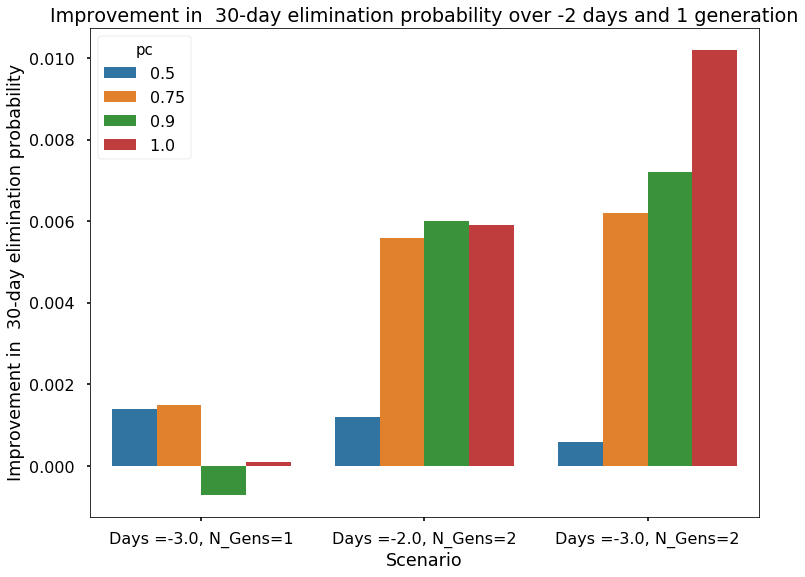

In [11]:
# Plot for detect = 0.1

detect = 0.1

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1", "Days =-2.0, N_Gens=2", "Days =-3.0, N_Gens=2"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")


    DAYS      pc  N_Gens  die_out  Baseline  Improvement
1   -3.0   $0.5$       2   0.8596    0.8584       0.0012
3   -3.0  $0.75$       2   0.8693    0.8632       0.0061
5   -3.0   $0.9$       2   0.8769    0.8683       0.0086
7   -3.0   $1.0$       2   0.8822    0.8741       0.0081
9   -2.0   $0.5$       2   0.8568    0.8584      -0.0016
11  -2.0  $0.75$       2   0.8676    0.8632       0.0044
13  -2.0   $0.9$       2   0.8702    0.8683       0.0019
15  -2.0   $1.0$       2   0.8763    0.8741       0.0022
0   -3.0   $0.5$       1   0.8586    0.8584       0.0002
2   -3.0  $0.75$       1   0.8684    0.8632       0.0052
4   -3.0   $0.9$       1   0.8741    0.8683       0.0058
6   -3.0   $1.0$       1   0.8787    0.8741       0.0046
8   -2.0   $0.5$       1   0.8584    0.8584       0.0000
10  -2.0  $0.75$       1   0.8632    0.8632       0.0000
12  -2.0   $0.9$       1   0.8683    0.8683       0.0000
14  -2.0   $1.0$       1   0.8741    0.8741       0.0000
    DAYS      pc  N_Gens  die_o

Text(0.5, 1.0, 'Improvement in  30-day elimination probability over -2 days and 1 generation')

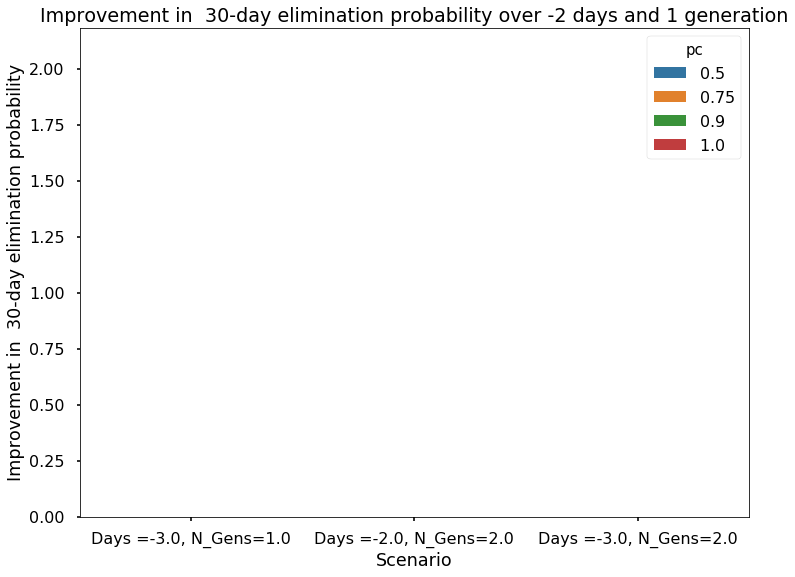

In [7]:
# Plot for detect = 0.1

detect = 0.5

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2.0, N_Gens=1.0']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3.0, N_Gens=1.0", "Days =-2.0, N_Gens=2.0", "Days =-3.0, N_Gens=2.0"],
            y='Improvement',
            data=mean_col,
            hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")
